# Luxury Watch

**Column Details**
* Brand: The brand of the watch.
* Model: The model name or number of the watch.
* Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).
* Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).
* Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).
* Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).
* Case Diameter (mm): The diameter of the watch case in millimeters.
* Case Thickness (mm): The thickness of the watch case in millimeters.
* Band Width (mm): The width of the watch strap or bracelet in millimeters.
* Dial Color: The color of the watch dial (e.g., black, blue, silver).
* Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).
* Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).
* Power Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).
* Price (USD): The retail price of the watch in US dollars.

In [1]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Luxurywatch.csv"

In [2]:
import pandas as pd
import numpy as np 
df= pd.read_csv(path)
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [5]:
features_to_remove = ['Brand']
df_clean = df.drop(features_to_remove, axis=1)

def convert_to_hours(value):
    if isinstance(value, str):
        if 'hours' in value:
            return float(value.replace(' hours', ''))
        elif 'days' in value:
            return float(value.replace(' days', '')) * 24
    return None

df_clean['Power Reserve'] = df_clean['Power Reserve'].apply(convert_to_hours)

df_clean['Power Reserve'] = df_clean['Power Reserve'].interpolate()

df_clean = df_clean.dropna()

df_clean.to_csv('Cleaned_Luxurywatch.csv', index=False)

print("Dataset pulito e salvato con successo.")


Dataset pulito e salvato con successo.


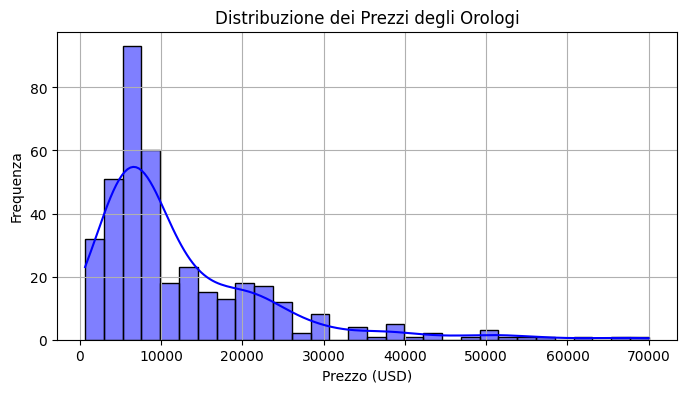

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Price (USD)'].str.replace(',', '').astype(float), kde=True, bins=30, color='blue')
plt.title("Distribuzione dei Prezzi degli Orologi")
plt.xlabel("Prezzo (USD)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

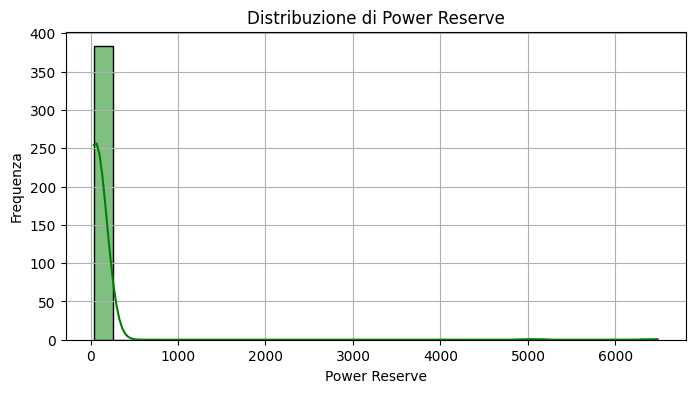

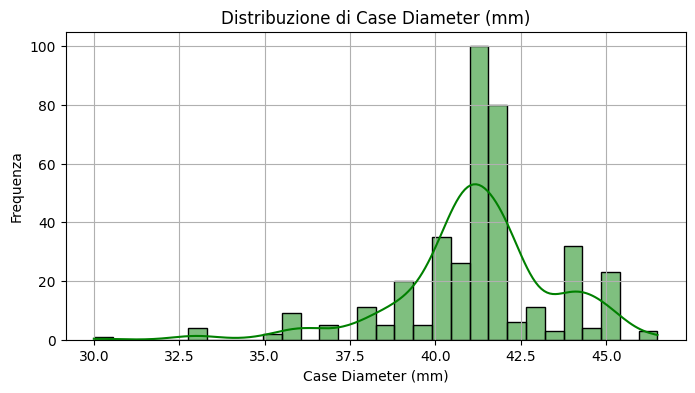

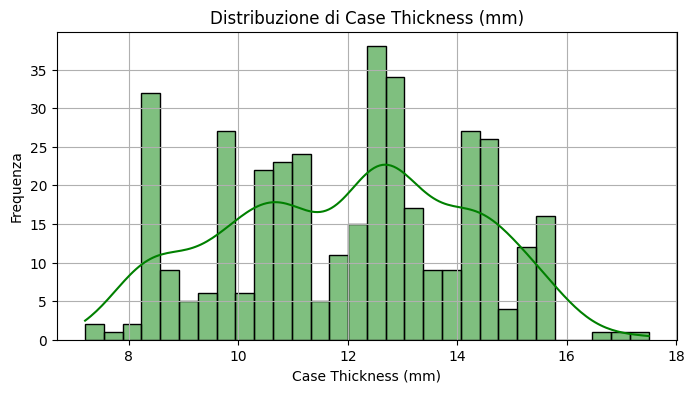

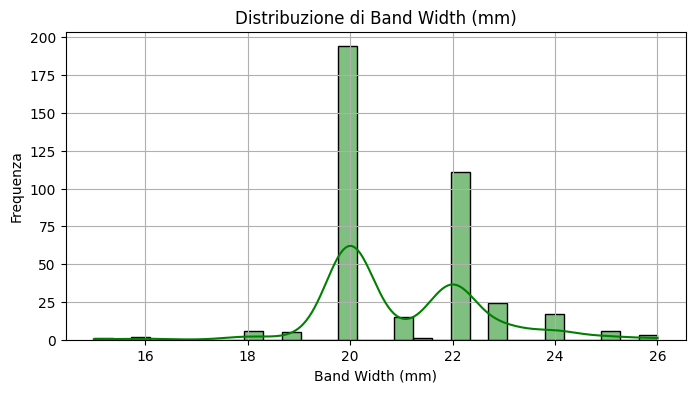

In [14]:
numerical_features = ['Power Reserve', 'Case Diameter (mm)', 'Case Thickness (mm)', 'Band Width (mm)']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[feature], kde=True, bins=30, color='green')
    plt.title(f"Distribuzione di {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequenza")
    plt.grid(True)
    plt.show()

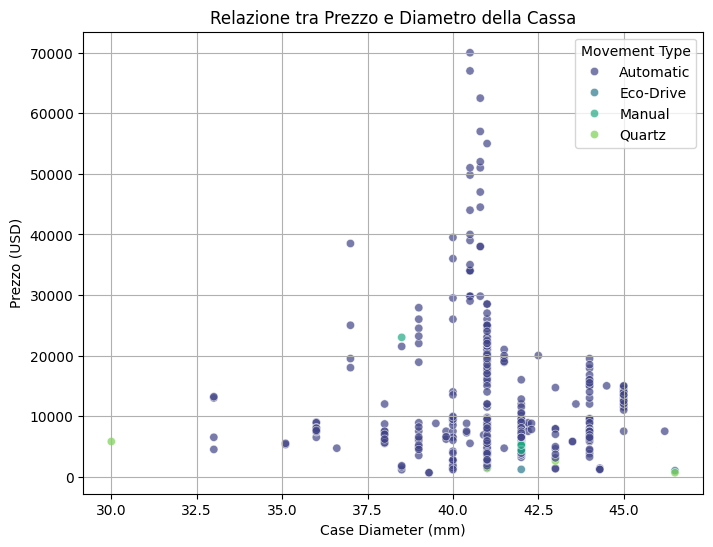

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Case Diameter (mm)',
    y=df_clean['Price (USD)'].str.replace(',', '').astype(float),
    hue='Movement Type',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
plt.title("Relazione tra Prezzo e Diametro della Cassa")
plt.xlabel("Case Diameter (mm)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Movement Type")
plt.grid(True)
plt.show()


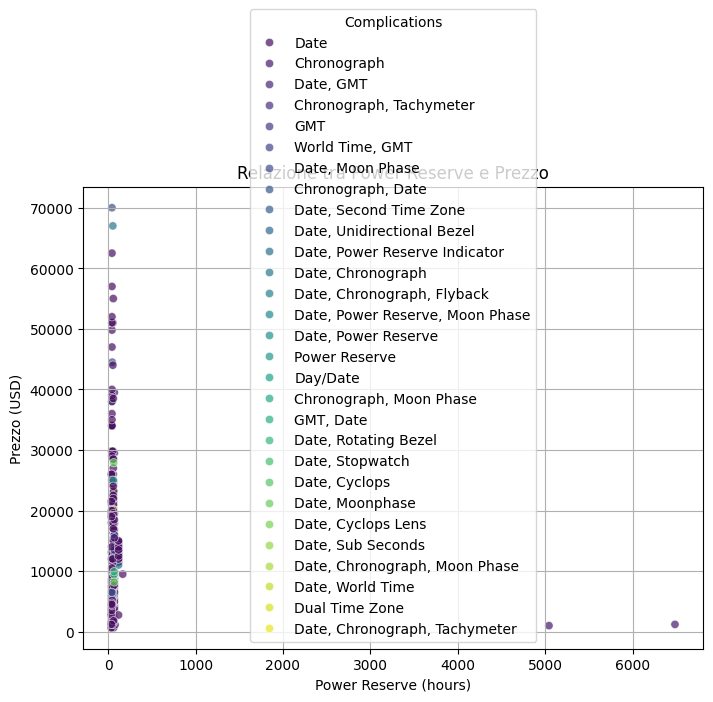

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Power Reserve',
    y=df_clean['Price (USD)'].str.replace(',', '').astype(float),
    hue='Complications',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
plt.title("Relazione tra Power Reserve e Prezzo")
plt.xlabel("Power Reserve (hours)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Complications")
plt.grid(True)
plt.show()

C:\Users\Martin Trentini\AppData\Local\Temp\ipykernel_10560\3964366728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complications', data=df_clean, palette='viridis', order=df_clean['Complications'].value_counts().index)


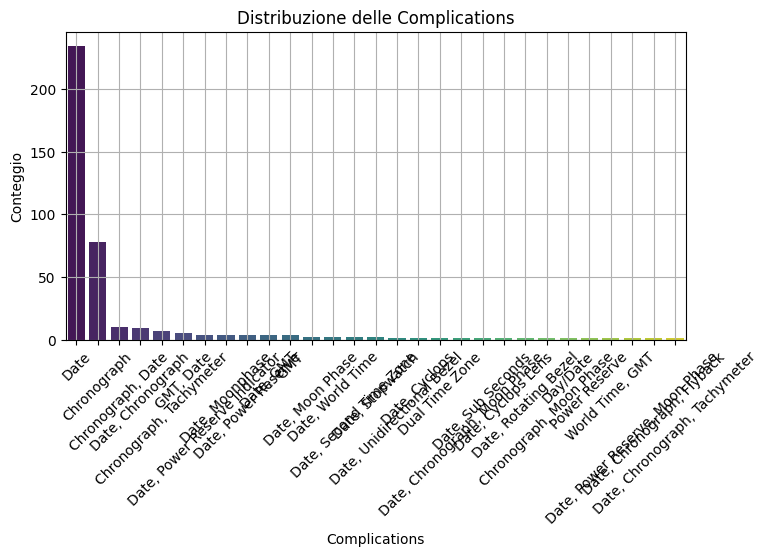

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Complications', data=df_clean, palette='viridis', order=df_clean['Complications'].value_counts().index)
plt.title("Distribuzione delle Complications")
plt.xlabel("Complications")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()